### Visualize Data

In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("Data.csv")

In [6]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [7]:
data['Job Title'].value_counts()

Job Title
Director of Marketing             12
Director of Operations            11
Senior Business Analyst           10
Senior Marketing Manager           9
Senior Marketing Analyst           9
                                  ..
Junior Social Media Specialist     1
Junior Operations Coordinator      1
Senior HR Specialist               1
Director of HR                     1
Junior Financial Advisor           1
Name: count, Length: 174, dtype: int64

In [8]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

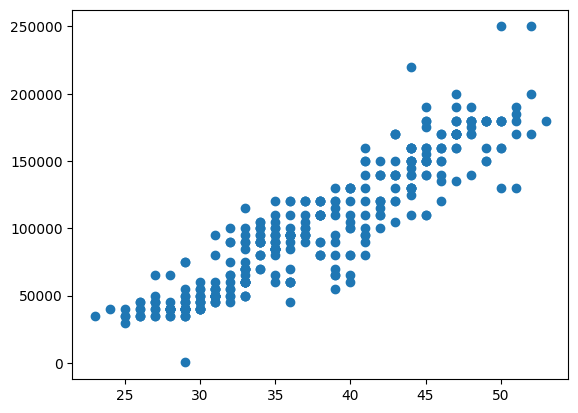

In [9]:
import matplotlib.pyplot as plt
x = data.Age

y = data.Salary
# plt.plot(figsize=(10,100))
plt.scatter(x,y)

<class 'pandas.core.series.Series'>


<BarContainer object of 375 artists>

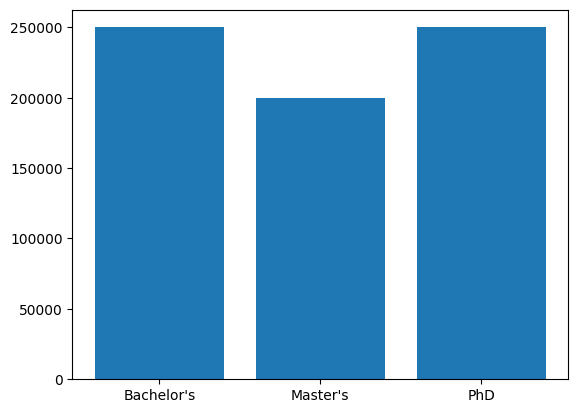

In [10]:
x = data['Education Level'].astype(str)
print(type(x))
y = data.Salary

plt.bar(x, y)

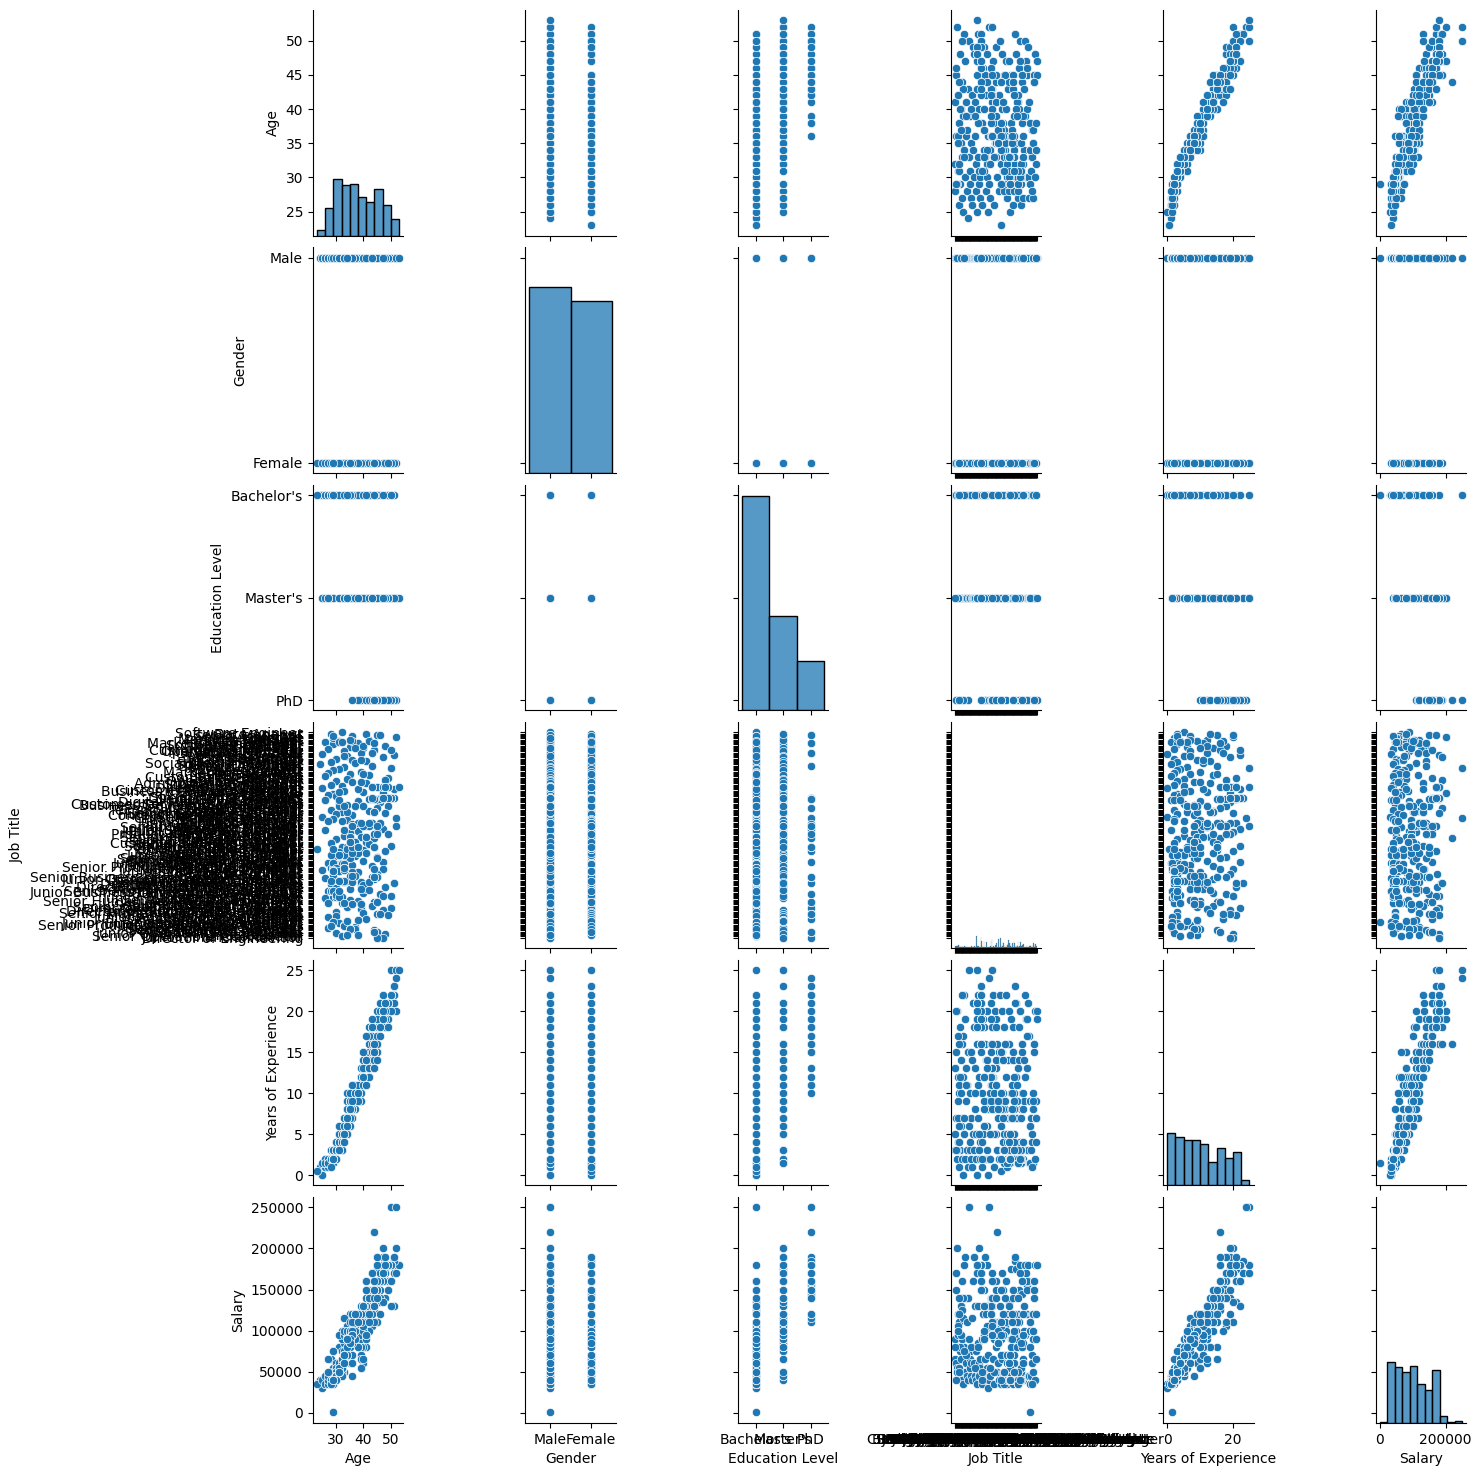

In [12]:
import seaborn as sns

sns.pairplot(data, vars = ['Age','Gender', 'Education Level', 'Job Title', 'Years of Experience','Salary'], kind='scatter')
plt.show()

Data Prepraration

Remove Missing Data

In [24]:
from sklearn.model_selection import train_test_split

data_encoded = pd.get_dummies(data, columns=["Education Level", "Gender", "Job Title"], drop_first=True)
data_encoded = data_encoded.fillna(0)  
print(data_encoded.columns)
X_train, X_test, Y_train, Y_test = train_test_split(data_encoded.drop("Salary", axis=1), data_encoded['Salary'], test_size=0.2, random_state=42)


Index(['Age', 'Years of Experience', 'Salary', 'Education Level_Master's',
       'Education Level_PhD', 'Gender_Male', 'Job Title_Accountant',
       'Job Title_Administrative Assistant', 'Job Title_Business Analyst',
       'Job Title_Business Development Manager',
       ...
       'Job Title_Supply Chain Manager', 'Job Title_Technical Recruiter',
       'Job Title_Technical Support Specialist', 'Job Title_Technical Writer',
       'Job Title_Training Specialist', 'Job Title_UX Designer',
       'Job Title_UX Researcher', 'Job Title_VP of Finance',
       'Job Title_VP of Operations', 'Job Title_Web Developer'],
      dtype='object', length=179)


Training

Model definition

In [22]:
# import optuma
from transformers import TrainingArguments, Trainer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()


In [25]:
model.fit(X_train, Y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
mse = mean_squared_error(y_pred, Y_test)
print(mse)

359721612.0980852


In [30]:
r2 = r2_score(Y_test, y_pred)
print(r2)

0.8593729037782051


In [32]:
threshold = 10000
accuracy = sum(abs(y_pred - Y_test) <= threshold) / len(Y_test) * 100
print(f"Accuracy within ±{threshold}: {accuracy:.2f}%")

Accuracy within ±10000: 61.33%


In [29]:
# New data
new_data = pd.DataFrame({
    "Education Level": ["Master"],
    "Gender": ["Male"],
    "Job Title": ["Manager"],
    "Age": 25,
    "Years of Experience": 5
})

# Preprocess new data
new_data_encoded = pd.get_dummies(new_data, columns=["Education Level", "Gender", "Job Title"], drop_first=True)
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)  # Align with training data columns

# Make predictions
new_predictions = model.predict(new_data_encoded)
print("Predicted Salary for New Data:", new_predictions)


Predicted Salary for New Data: [63789.3123056]


In [33]:
from sklearn.linear_model import PoissonRegressor

model = PoissonRegressor()

model.fit(X_train, Y_train)



d:\Personal-project\env3.9\lib\site-packages\sklearn\linear_model\_glm\glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


PoissonRegressor()

In [34]:
y_pred_poisson = model.predict(X_test)

In [35]:
print(mean_squared_error(y_pred_poisson, Y_test))

350602705.76302445


In [38]:
accuracy = sum(abs(y_pred_poisson - Y_test) <= threshold) / len(Y_test) * 100
print(f"Accuracy within ±{threshold}: {accuracy:.2f}%")

Accuracy within ±10000: 58.67%


In [42]:
# from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


# model_VR = VotingRegressor()
model_RFR = RandomForestRegressor(n_estimators=100, random_state=42)
model_SVR = SVR(kernel='rbf', C=1.0, epsilon=0.2)

# model_VR.fit(X_train, Y_train)
model_RFR.fit(X_train, Y_train)
model_SVR.fit(X_train, Y_train)

y_pred_multiple_models = []
for each_model in [ model_RFR, model_SVR]:
    each_model.fit(X_train, Y_train)
    prediction = each_model.predict(X_test)
    y_pred_multiple_models.append(prediction)
    accuracy = sum(abs(prediction - Y_test) <= threshold) / len(Y_test) * 100
    print(f"Accuracy within ±{threshold}: {accuracy:.2f}%")


Accuracy within ±10000: 57.33%
Accuracy within ±10000: 18.67%


Parameter testing with Optima on RandomForestRegressor 

In [51]:
import optuna

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameter search space
    number_of_trees = trial.suggest_int("batch_size", 50, 200, step=10)
    model_RFR_trial = RandomForestRegressor(n_estimators=number_of_trees, random_state=42)

    model_RFR_trial.fit(X_train, Y_train)

    y_pred_trial = model_RFR_trial.predict(X_test)

    accuracy = sum(abs(y_pred_trial - Y_test) <= threshold) / len(Y_test) * 100
    print(f"Accuracy = {accuracy}")
    return accuracy
    

# Create Optuna study and optimize for precision
study = optuna.create_study(direction="maximize")  # Maximize precision
study.optimize(objective, n_trials=10)  # Number of trials

# Print the best parameters
print("Best trial:")
print(study.best_trial)


[I 2025-03-26 21:16:11,082] A new study created in memory with name: no-name-767d32e3-72b5-43dc-a06e-b50fd7cf501d
[I 2025-03-26 21:16:11,165] Trial 0 finished with value: 61.33333333333333 and parameters: {'batch_size': 60}. Best is trial 0 with value: 61.33333333333333.
[I 2025-03-26 21:16:11,316] Trial 1 finished with value: 58.666666666666664 and parameters: {'batch_size': 90}. Best is trial 0 with value: 61.33333333333333.


Accuracy = 61.33333333333333
Accuracy = 58.666666666666664


[I 2025-03-26 21:16:11,582] Trial 2 finished with value: 57.333333333333336 and parameters: {'batch_size': 160}. Best is trial 0 with value: 61.33333333333333.


Accuracy = 57.333333333333336
Accuracy = 58.666666666666664


[I 2025-03-26 21:16:11,799] Trial 3 finished with value: 58.666666666666664 and parameters: {'batch_size': 90}. Best is trial 0 with value: 61.33333333333333.
[I 2025-03-26 21:16:11,973] Trial 4 finished with value: 58.666666666666664 and parameters: {'batch_size': 50}. Best is trial 0 with value: 61.33333333333333.


Accuracy = 58.666666666666664


[I 2025-03-26 21:16:12,286] Trial 5 finished with value: 56.00000000000001 and parameters: {'batch_size': 110}. Best is trial 0 with value: 61.33333333333333.


Accuracy = 56.00000000000001


[I 2025-03-26 21:16:12,521] Trial 6 finished with value: 57.333333333333336 and parameters: {'batch_size': 100}. Best is trial 0 with value: 61.33333333333333.
[I 2025-03-26 21:16:12,643] Trial 7 finished with value: 61.33333333333333 and parameters: {'batch_size': 60}. Best is trial 0 with value: 61.33333333333333.


Accuracy = 57.333333333333336
Accuracy = 61.33333333333333


[I 2025-03-26 21:16:12,951] Trial 8 finished with value: 57.333333333333336 and parameters: {'batch_size': 170}. Best is trial 0 with value: 61.33333333333333.


Accuracy = 57.333333333333336


[I 2025-03-26 21:16:13,174] Trial 9 finished with value: 57.333333333333336 and parameters: {'batch_size': 150}. Best is trial 0 with value: 61.33333333333333.


Accuracy = 57.333333333333336
Best trial:
FrozenTrial(number=0, state=TrialState.COMPLETE, values=[61.33333333333333], datetime_start=datetime.datetime(2025, 3, 26, 21, 16, 11, 83218), datetime_complete=datetime.datetime(2025, 3, 26, 21, 16, 11, 164728), params={'batch_size': 60}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'batch_size': IntDistribution(high=200, log=False, low=50, step=10)}, trial_id=0, value=None)
